<a href="https://colab.research.google.com/github/dxmai/CS114.L21.KHCL/blob/main/Colab/DuDoanDiemCuoiKi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BÀI TẬP COLAB SỐ 3 : DỰ DOÁN ĐIỂM CUỐI KÌ**

IMPORT LIBRARIES

Nguồn tham khảo: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np



In [4]:
import pandas as pd
url= 'https://raw.githubusercontent.com/nguyenhuong2001/DuDoanDiemThiCuoiKi/main/wecode.zip'
wecode=pd.read_csv(url)
wecode.head(10)

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
5,9,0,5,4,0,Compilation Error,0,100,solution-5,2,2020-10-30 11:16:57,2020-10-30 11:16:58
6,10,0,6,4,1,SCORE,10000,100,solution-6,2,2020-10-30 11:18:47,2020-10-30 11:18:55
7,11,0,7,4,1,SCORE,10000,100,solution-7,2,2020-10-30 11:20:07,2020-10-30 11:20:15
8,12,0,8,4,1,SCORE,10000,100,solution-8,2,2020-10-30 11:21:02,2020-10-30 11:21:10
9,13,0,9,4,1,SCORE,10000,100,solution-9,2,2020-10-30 11:21:36,2020-10-30 11:21:44


In [5]:
url2='https://raw.githubusercontent.com/nguyenhuong2001/DuDoanDiemThiCuoiKi/main/score_training.csv'
score=pd.read_csv(url2)
score

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
...,...,...,...,...,...,...,...
970,1857,5,4.5,10,4,6,6.03
971,1859,8,5,10,1.5,5.4,5.06
972,1862,5,6.5,1,7.5,5.1,4.71
973,1865,6.5,,3,7.5,,6.89


**Bỏ một số cột không cần thiết**

In [6]:
wecode_new=wecode[['id','user_id','assignment_id','problem_id','is_final','status','pre_score','coefficient']]
wecode_new.head()

,id,user_id,assignment_id,problem_id,is_final,status,pre_score,coefficient
0,4,4,0,3,1,SCORE,10000,100
1,5,4,0,4,1,SCORE,10000,100
2,6,4,0,5,0,Compilation Error,0,100
3,7,4,0,5,0,Compilation Error,0,100
4,8,4,0,5,0,Compilation Error,0,100


In [7]:
score_new= score[['id','CK']]
score_new=score_new.rename (columns={'id':'user_id'}) 
score_new

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
...,...,...
970,1857,4
971,1859,1.5
972,1862,7.5
973,1865,7.5


**Gom nhóm dữ liệu**

In [8]:
#Tổng các problem có submit
wecode1= wecode_new.groupby ('user_id',as_index=False).problem_id.nunique()
wecode1=wecode1.rename(columns={'problem_id':'sum_problem'})
wecode1

,user_id,sum_problem
0,1,2
1,4,41
2,5,5
3,6,88
4,7,2
...,...,...
1154,1860,43
1155,1862,6
1156,1864,63
1157,1865,17


In [9]:
#Tổng số lần submit
wecode2= wecode_new.groupby('user_id',as_index= False).id.count() 
wecode2=wecode2.rename (columns={'id':'count_submit'}) 
wecode2

,user_id,count_submit
0,1,2
1,4,54
2,5,6
3,6,130
4,7,5
...,...,...
1154,1860,76
1155,1862,12
1156,1864,187
1157,1865,99


Đoạn groupby này có tham khảo nhóm của bạn Cao Hưng Phú

In [10]:
# Tổng số điểm của những bài có (is_final=1)
df=wecode_new.groupby('user_id')
wecode3=pd.DataFrame ({'sum_score':df.apply(lambda x:x[ x['is_final']==1]['pre_score'].sum())})# đoạn này tham khảo nè
wecode3

,sum_score
user_id,
1,10000
4,370000
5,30000
6,850000
7,9209
...,...
1860,329665
1862,40000
1864,439741


In [12]:
#Tổng số lần submit đúng (pre_score=10000)
wecode4 =pd.DataFrame({'pre_full':df['pre_score'].apply(lambda x:( x==10000).sum())   })
wecode4

,pre_full
user_id,
1,1
4,44
5,3
6,89
7,0
...,...
1860,29
1862,4
1864,30


Gộp các bảng lại thành 1 bảng

In [13]:
data_index1=pd.merge(wecode1,wecode2,how='left',on='user_id')
data_index2=pd.merge(data_index1,wecode3,how='left',on='user_id')
data_index3=pd.merge (data_index2,wecode4, how='left',on='user_id')
data = pd.merge(data_index3,score_new,how='left',on='user_id')
data.head(20)

,user_id,sum_problem,count_submit,sum_score,pre_full,CK
0,1,2,2,10000,1,NaN
1,4,41,54,370000,44,NaN
2,5,5,6,30000,3,NaN
3,6,88,130,850000,89,NaN
4,7,2,5,9209,0,NaN
5,11,18,50,100316,19,NaN
6,14,7,22,68000,7,NaN
7,15,50,101,458666,56,NaN
8,20,12,13,120000,12,NaN
9,24,78,164,750299,80,9.5


**Tách ra 2 bảng : bảng có điểm cuối kỳ và bảng chưa có điểm cuối kỳ**

In [14]:
data_predict=data[pd.isnull(data["CK"])]
data_predict.head(20)

,user_id,sum_problem,count_submit,sum_score,pre_full,CK
0,1,2,2,10000,1,NaN
1,4,41,54,370000,44,NaN
2,5,5,6,30000,3,NaN
3,6,88,130,850000,89,NaN
4,7,2,5,9209,0,NaN
5,11,18,50,100316,19,NaN
6,14,7,22,68000,7,NaN
7,15,50,101,458666,56,NaN
8,20,12,13,120000,12,NaN
12,31,3,13,30000,3,NaN


In [15]:
data_training= data[pd.notnull(data["CK"])]
data_training.head(20)

,user_id,sum_problem,count_submit,sum_score,pre_full,CK
9,24,78,164,750299,80,9.5
10,27,5,13,39000,4,10
11,29,80,199,762760,75,8.5
13,34,84,218,822888,81,6.5
14,35,147,297,1477000,152,4.5
15,37,102,312,979712,100,7.5
16,40,191,664,2111388,227,8
17,41,71,110,636888,64,8
18,42,181,324,1925142,192,7.5
19,43,98,448,1541357,175,6


Biểu diễn dưới dạng biểu đồ

- sum_problem : tổng số problem đã submit
- count_submit : tổng số lần submit
- sum_score : Tổng số điểm của những bài có (is_final=1)
- pre_full : số lần submit đúng (pre_score=10000)
**************************************
CÁC CÔNG THỨC CÓ THỂ TÍNH : 
1. Tổng số điểm của những bài có (is_final=1)
2. Số lần submit đúng
3. Tổng số lần submit
4. Tổng số problem đã submit  => BO
5. Số lần submit đúng /  Tổng số problem đã submit (Heso_submit1)
6. Số lần submit đúng /  Tổng số lần submit(Heso_submit2)
7. Tổng số prolem đã submit / Tổng số lần submit  (Heso_submit3)


# **Vẽ biểu đồ**

[Text(0, 0.5, 'Final score'),
 Text(0.5, 0, 'Total number of submissions'),
 Text(0.5, 1.0, 'Third Plot')]

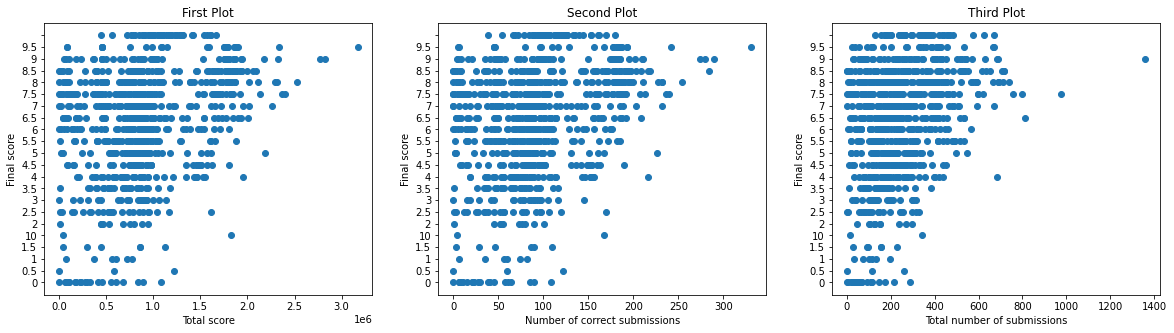

In [24]:
data_training=data_training.sort_values (by='CK')
_, (axes1, axes2, axes3) = plt.subplots(nrows=1, ncols=3 , figsize=(20, 5))

#1. Tổng số điểm của những bài có is_final = 1
axes1.scatter(data_training['sum_score'], y= data_training['CK'])
axes1.set(xlabel = 'Total score', ylabel = 'Final score', title = 'First Plot')

#2. Số lần submit đúng 
axes2.scatter(data_training['pre_full'], y= data_training['CK'])
axes2.set(xlabel = 'Number of correct submissions', ylabel = 'Final score', title = 'Second Plot')

#3. Tổng số lần submit
axes3.scatter(data_training['count_submit'], y= data_training['CK'])
axes3.set(xlabel = 'Total number of submissions', ylabel = 'Final score', title = 'Third Plot')

Nhận xét :

* Tổng điểm của mỗi user_id có xu hướng phân bổ không đều và tăng dần theo số điểm cuối kì.

Nhận xét :

*Tổng số lần submit của các user phân bổ không đều, có xu hướng tăng dần theo điểm cuối kì
* Những user có số lần nộp cao hơn 500 đa số có số điểm từ 5 điểm trở lên, còn những user có số lần submit dưới 500, đa số có điểm cuối kỳ dưới 5 điểm.
* Có vẻ là những user nào có số lần submit nhiều thì điểm cuối kì đa số đạt điểm số cao.

In [26]:
data_training= data[pd.notnull(data["CK"])]
data_training

,user_id,sum_problem,count_submit,sum_score,pre_full,CK
9,24,78,164,750299,80,9.5
10,27,5,13,39000,4,10
11,29,80,199,762760,75,8.5
13,34,84,218,822888,81,6.5
14,35,147,297,1477000,152,4.5
...,...,...,...,...,...,...
1151,1856,31,64,270790,23,7.5
1152,1857,34,55,386000,37,4
1153,1859,27,31,39000,3,1.5
1155,1862,6,12,40000,4,7.5


In [32]:
# Thêm 3 cột : 
#Số lần submit đúng / Tổng số problem đã submit  (Heso_submit1)
#Số lần submit đúng / Tổng số lần submit         (Heso_submit2)
#Tổng số prolem đã submit / Tổng số lần submit   (Heso_submit3)
data_training['Heso_submit1'] =data_training.apply(lambda x: x['pre_full'] / x['sum_problem'], axis=1)

data_training.head(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,user_id,sum_problem,count_submit,sum_score,pre_full,CK,Heso_submit2,Heso_submit1
9,24,78,164,750299,80,9.5,0.487805,1.025641
10,27,5,13,39000,4,10,0.307692,0.800000
11,29,80,199,762760,75,8.5,0.376884,0.937500
13,34,84,218,822888,81,6.5,0.371560,0.964286
14,35,147,297,1477000,152,4.5,0.511785,1.034014
15,37,102,312,979712,100,7.5,0.320513,0.980392
16,40,191,664,2111388,227,8,0.341867,1.188482
17,41,71,110,636888,64,8,0.581818,0.901408
18,42,181,324,1925142,192,7.5,0.592593,1.060773
19,43,98,448,1541357,175,6,0.390625,1.785714


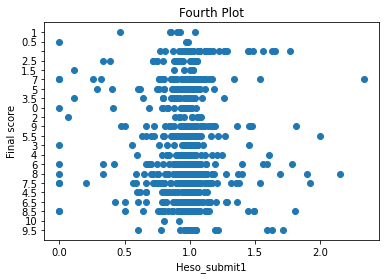

In [33]:
#4. Số lần đạt điểm tối đa trên tổng số problem
#data_training=data_training.sort_values(by='CK')
plt.scatter (data_training['Heso_submit1'], y= data_training['CK'])
plt.title ("Fourth Plot")
plt.xlabel("Heso_submit1")
plt.ylabel("Final score")
plt.show()

In [29]:
data_training= data[pd.notnull(data["CK"])]

In [34]:
data_training['Heso_submit2'] =data_training.apply(lambda x: x['pre_full'] / x['count_submit'], axis=1)
data_training.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,user_id,sum_problem,count_submit,sum_score,pre_full,CK,Heso_submit2,Heso_submit1
9,24,78,164,750299,80,9.5,0.487805,1.025641
10,27,5,13,39000,4,10,0.307692,0.800000
11,29,80,199,762760,75,8.5,0.376884,0.937500
13,34,84,218,822888,81,6.5,0.371560,0.964286
14,35,147,297,1477000,152,4.5,0.511785,1.034014
15,37,102,312,979712,100,7.5,0.320513,0.980392
16,40,191,664,2111388,227,8,0.341867,1.188482
17,41,71,110,636888,64,8,0.581818,0.901408
18,42,181,324,1925142,192,7.5,0.592593,1.060773
19,43,98,448,1541357,175,6,0.390625,1.785714


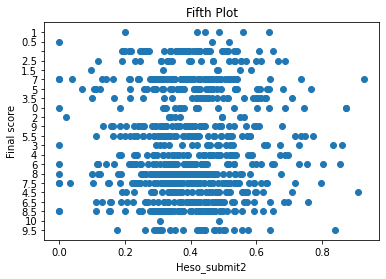

In [35]:
#5. Tổng số lần submit đúng / tổng submit
#data_training=data_training.sort_values(by='CK')
plt.scatter (data_training['Heso_submit2'], y= data_training['CK'])
plt.title ("Fifth Plot")
plt.xlabel("Heso_submit2")
plt.ylabel("Final score")
plt.show()

In [ ]:
data_training= data[pd.notnull(data["CK"])]

In [36]:
data_training['Heso_submit3'] =data_training.apply(lambda x: x['sum_problem'] / x['count_submit'], axis=1)
data_training.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,user_id,sum_problem,count_submit,sum_score,pre_full,CK,Heso_submit2,Heso_submit1,Heso_submit3
9,24,78,164,750299,80,9.5,0.487805,1.025641,0.475610
10,27,5,13,39000,4,10,0.307692,0.800000,0.384615
11,29,80,199,762760,75,8.5,0.376884,0.937500,0.402010
13,34,84,218,822888,81,6.5,0.371560,0.964286,0.385321
14,35,147,297,1477000,152,4.5,0.511785,1.034014,0.494949
15,37,102,312,979712,100,7.5,0.320513,0.980392,0.326923
16,40,191,664,2111388,227,8,0.341867,1.188482,0.287651
17,41,71,110,636888,64,8,0.581818,0.901408,0.645455
18,42,181,324,1925142,192,7.5,0.592593,1.060773,0.558642
19,43,98,448,1541357,175,6,0.390625,1.785714,0.218750


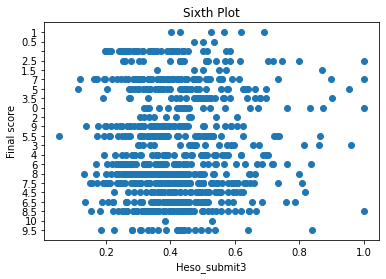

In [37]:
#6. Tổng problem đã submit / Tổng submit
#data_training=data_training.sort_values(by='CK')
plt.scatter (data_training['Heso_submit3'], y= data_training['CK'])
plt.title ("Sixth Plot")
plt.xlabel("Heso_submit3")
plt.ylabel("Final score")
plt.show()